In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
Survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
Survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


C:\Users\Praktika\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (17,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
Survey.describe()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampRecommend,ChildrenNumber,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,...,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeSimplilearn,YouTubeTheNewBoston
count,15367.000000,17709.000000,1069.000000,1079.000000,1073.000000,2314.000000,1609.0,165.0,1708.0,290.0,...,993.0,6036.0,1261.0,3539.0,2662.0,1396.0,3327.0,622.0,201.0,2960.0
mean,27.691872,0.062002,0.699719,0.305839,0.818267,1.832325,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,8.559239,0.241167,0.458594,0.460975,0.385805,0.972813,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,22.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,26.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,32.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,90.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [4]:
print(Survey.iloc[0,:].to_string())

Age                                                            27
AttendedBootcamp                                                0
BootcampFinish                                                NaN
BootcampLoanYesNo                                             NaN
BootcampName                                                  NaN
BootcampRecommend                                             NaN
ChildrenNumber                                                NaN
CityPopulation                                more than 1 million
CodeEventConferences                                          NaN
CodeEventDjangoGirls                                          NaN
CodeEventFCC                                                  NaN
CodeEventGameJam                                              NaN
CodeEventGirlDev                                              NaN
CodeEventHackathons                                           NaN
CodeEventMeetup                                               NaN
CodeEventN

Taking a look a the data, we see that there are a lot of criteria used for this survey. Since we are interested into potential markets for our company products. We would like to see where people are looking for information. Which websites are the mos frequented as well as events like Hackathon etc.. In the data we see that there are multiple columns describing youtube channels like [`Coputerphile`](https://www.youtube.com/user/Computerphile). There are also links to Podcasts and some free online resources like the famous [`Stack Overflow`](https://stackoverflow.com/).

We can also invetigate where most of the population is learning to code. Fo example websites like `Udacity` or `Coursera`. A well as which technology fileds are the most desired E.g `Web Developement`, `Data Science` etc

In this case we are using premade data, since the survey provides valuable information with more than 30K participants. The data is open source and can be downloaded from the following GitHub [repository](https://github.com/freeCodeCamp/2017-new-coder-survey)

# Checking for Sample Representativity

In [5]:
# Take a look a the Roles people would like to take future jobs. Frequency distribution table

Interest = Survey['JobRoleInterest'].value_counts(normalize = True)*100
Interest

Full-Stack Web Developer                                                                                                                                         11.770595
  Front-End Web Developer                                                                                                                                         6.435927
  Data Scientist                                                                                                                                                  2.173913
Back-End Web Developer                                                                                                                                            2.030892
  Mobile Developer                                                                                                                                                1.673341
                                                                                                                                                 

When observing the distribution table, we can see that some people are not only interested in one single field, but into multiple fields as future job roles. Taking a sample out of this population in order to identify new programmers is possible, we can also identify the portion of  options participants chose. 

In [6]:
# we see that 61% of the data is NA, so we can drop thos row first and split the list

Interests_no_na = Survey['JobRoleInterest'].dropna()

In [7]:
Interests_no_na.str.split(',').apply(lambda x: len(x)).value_counts(normalize = True)*100


1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

Here we see that most of the participants had a clear Job Role aspiration (around 32\%). Beeing those Full Stack Developers. Let us Visualize this more in detail by looking only at the courses like web developement and mobile developement

In [8]:
Web_or_not = Interests_no_na.str.contains('Web Developer|Mobile Developer').value_counts(normalize = True)*100

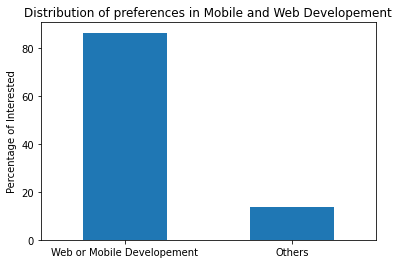

In [9]:
Web_or_not.plot.bar()
plt.xticks(ticks=[0,1], labels=['Web or Mobile Developement', 'Others'], rotation = 0)
plt.ylabel('Percentage of Interested')
plt.title('Distribution of preferences in Mobile and Web Developement')



plt.show()

It is clear to see that the number of interested in Web or Mobile Developement significant ist. In fact the population is very representative for our case.

In [10]:
Survey.CountryLive.value_counts(normalize = True).round(3).head()*100

United States of America    37.8
India                        9.1
United Kingdom               4.9
Canada                       4.0
Brazil                       2.4
Name: CountryLive, dtype: float64

In [11]:
Survey.CountryLive.value_counts().head()

United States of America    5791
India                       1400
United Kingdom               757
Canada                       616
Brazil                       364
Name: CountryLive, dtype: int64

Looking at the results, we can observe that USA and India a lot of potential customers has. So it would be wise to choose those two as our markets to advertise in. Neverthenless this decision is not 100% safe, since the nuber of people in india may not have the same buying power than the customers in USA. So here we would need to see if people in india would be interested in payed products.

In [12]:
Countries = Survey.copy()
Countries = Countries[Countries['JobRoleInterest'].notnull()]
# Countries.MonthsProgramming.fillna(1, inplace = True)
Countries.MonthsProgramming.replace(0,1, inplace = True)
Countries['Money_month'] = Countries['MoneyForLearning']/Countries['MonthsProgramming']

In [13]:
Countries.isnull().sum()

Age                     153
AttendedBootcamp         98
BootcampFinish         6632
BootcampLoanYesNo      6627
BootcampName           6676
                       ... 
YouTubeMozillaHacks    6818
YouTubeOther           6525
YouTubeSimplilearn     6920
YouTubeTheNewBoston    5849
Money_month             675
Length: 137, dtype: int64

In [14]:
Countries = Countries[Countries['Money_month'].notna()]
Countries = Countries[Countries['CountryLive'].notna()]

In [15]:
Countries.CountryLive.value_counts()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
                            ... 
Trinidad & Tobago              1
Anguilla                       1
Cuba                           1
Mozambique                     1
Jordan                         1
Name: CountryLive, Length: 131, dtype: int64

In [16]:
Countries.groupby('CountryLive').agg([np.mean, np.median]).loc[['United States of America', 'India', 'United Kingdom', 'Canada']]['Money_month']

,mean,median
CountryLive,,
United States of America,227.997996,3.333333
India,135.100982,0.000000
United Kingdom,45.534443,0.000000
Canada,113.510961,0.000000


Wee see that by looking at the mean value spent on learning the ranking changes, even tough there are more potential customers on United Kingdom than Canada. But tha sample population does not consume as most as the ones on the UK. But I looks odd to see UK spending less money than canada or India.. Let us check then, if there are any outliers in the data that makes the result look like that

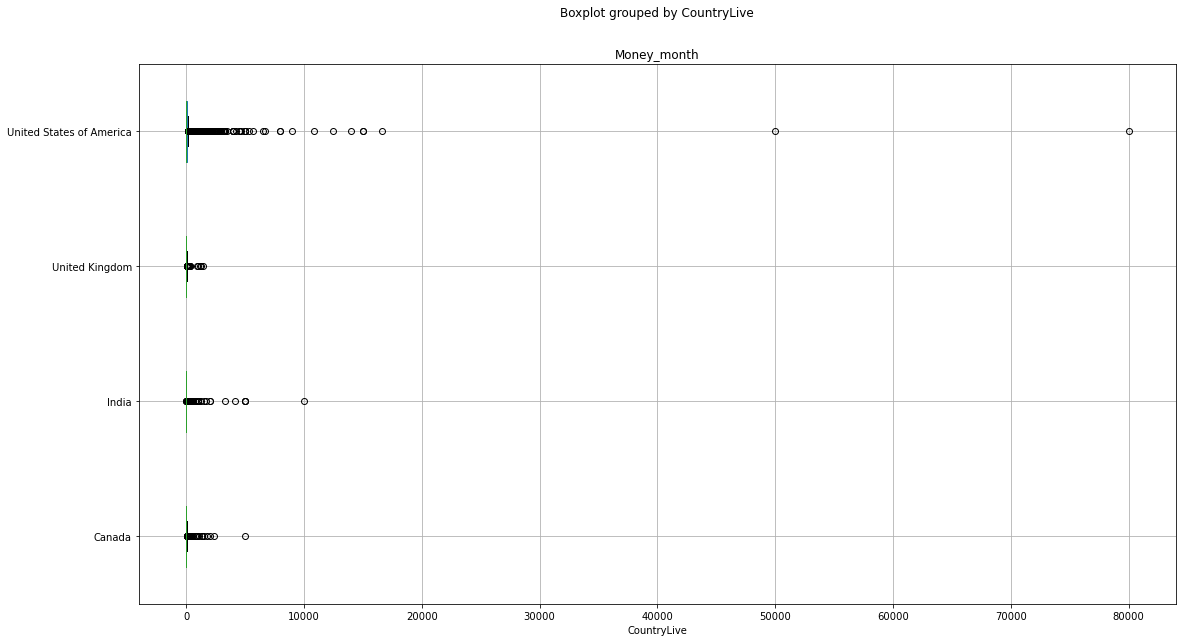

In [42]:
(Countries[Countries['CountryLive']
          .isin(['United States of America', 'India', 'United Kingdom', 'Canada'])
          ]
          .boxplot(column='Money_month', by='CountryLive', figsize=(18,10), vert = False)
    )

plt.show()

It looks like from the Boxplot, that US has some very unrealistic values. Meaning that there are people spending more than 80K a month in learning ressources. This may not be impossible but looks more like an error in the data. India has also users spending 20K a month for learning. For this reason, we will filter the data by money spent under 20K a month and replot the distributions

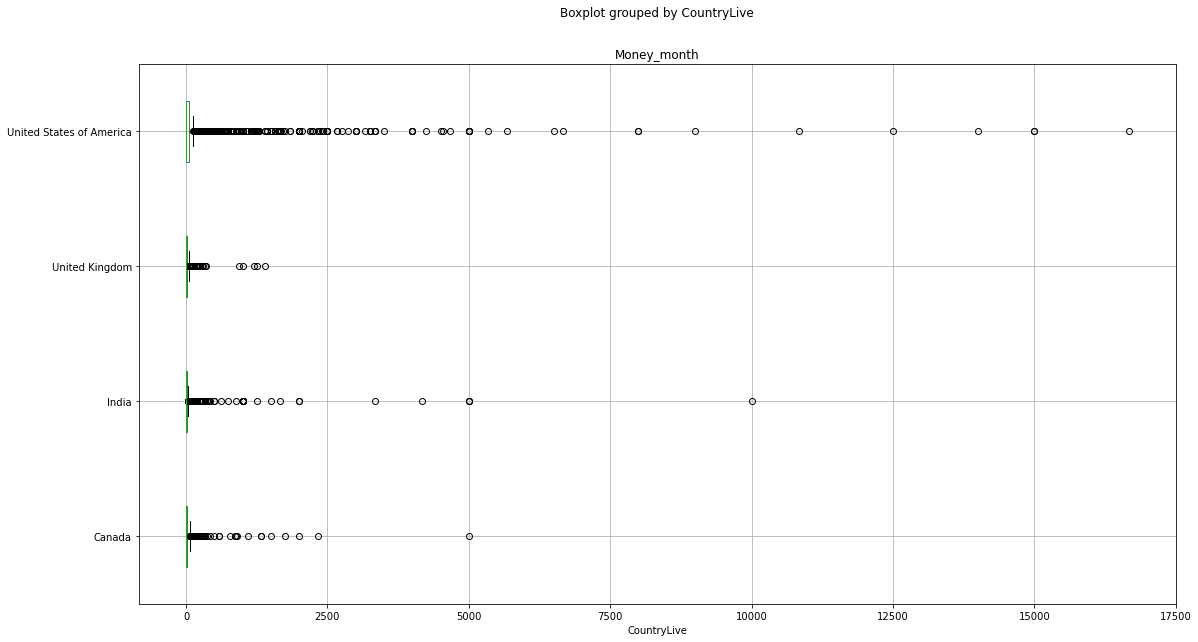

In [43]:
(Countries[
    (Countries['CountryLive'].isin(['United States of America', 'India', 'United Kingdom', 'Canada']))
    &
    (Countries['Money_month'] < 20000)
          ]
          .boxplot(column='Money_month', by='CountryLive', figsize=(18,10), vert=False)
    )
plt.show()
    

Now 20K seems also like a lot of money, even 5K is alot. But for people that attended a Bootcamp for example, this may be a normal scenario. Let use see how much people that are at least over 4K a month did not attend a bootcamp.

In [68]:
# India
India_outliers = (
    Countries[(Countries['CountryLive'] == 'India') & 
              (Countries['Money_month'] > 4000) & 
              (Countries['AttendedBootcamp'] == 0)]
)
India_outliers.shape

(5, 137)

There are 5 people from India spending more than 4K a month and have attended a Bootcamp. So the reason why they are spending so much is even more unclear.

In [69]:
# USA
USA_outliers =(
    Countries[(Countries['CountryLive'] == 'United States of America') & 
              (Countries['Money_month'] > 4000) & 
              (Countries['AttendedBootcamp'] == 0)]
              )
USA_outliers.shape

(11, 137)

For USA we have the same situation, here we have 11 people. Let us remove the outlier rows 

In [72]:
most_relevant = ['United States of America', 'India', 'United Kingdom', 'Canada']

Outliers = (
    Countries[(Countries['CountryLive'].isin(most_relevant)) &
              (Countries['Money_month'] > 4000) & 
              (Countries['AttendedBootcamp'] == 0)
             ]
            )

Outliers.shape

(16, 137)

In [109]:
Countries_clean = Countries.drop(Outliers.index)

Countries_montly= Countries_clean.groupby('CountryLive').agg(np.mean).loc[['United States of America', 'India', 'United Kingdom', 'Canada']]['Money_month'].to_frame().reset_index()
Countries_montly

,CountryLive,Money_month
0,United States of America,169.889843
1,India,72.893205
2,United Kingdom,45.534443
3,Canada,113.510961


Now the mean values for each country look different. In second place we have canada and India went to third place. Let's summarize the results a little more in detail.

In [150]:
Countries_count_abs = Countries_clean.CountryLive.value_counts().head(4).to_frame().reset_index()
Countries_count_rel = Countries_clean.CountryLive.value_counts(normalize = True).head(4).multiply(100).to_frame().reset_index()

In [151]:
Countries_merged = (
    Countries_montly.
        merge(Countries_count_abs, left_on='CountryLive', right_on='index').
        merge(Countries_count_rel, left_on='CountryLive_x', right_on='index')
                    
)

In [152]:
Countries_merged = Countries_merged.loc[:,['CountryLive_x', 'Money_month', 'CountryLive_y', 'CountryLive']].rename({'CountryLive_x':'Country', 'CountryLive_y':'Nr_customers_Abs', 'CountryLive':'Nr_customers_rel'},axis = 1)


In [153]:
Countries_merged

,Country,Money_month,Nr_customers_Abs,Nr_customers_rel
0,United States of America,169.889843,2922,47.159458
1,India,72.893205,458,7.391866
2,United Kingdom,45.534443,279,4.502905
3,Canada,113.510961,240,3.873467


We can observe that USA, India and Canada could invest in a 59\$ a month membership. But the USA Market is indeed the most interesting one , since it makes almost 50\% of the Market and has the highes buying power. Then we can look after a secondary market , either India or Canada. In India, we have almost the double an potential customers, but the buying power is half canada's. Therefore we could split the marketing budget into three countries and so get mor chances to lock customers. But the most wise decision is to send the data to the marketing department and let them decide based on the insights found. 